In [3]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon


%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
os.getcwd()

'/Users/sophiesax/OneDrive/Desktop/UCL/Dissertation'

In [5]:
os.chdir("/Users/sophiesax/Documents")

In [6]:
core_location = np.loadtxt(fname = 'core_locations.csv', delimiter = ',', dtype = 'str')

In [7]:
print(core_location)

[['\ufeffCore' 'Latitude' 'Longitude']
 ['U1304' '53' '-33.529']
 ['ODP1057' '32.02886111' '-76.07922222']
 ['ODP1059' '31.67433' '-75.41877']
 ['ODP1060' '30.75994' '-74.4665']
 ['ODP1061' '29.975389' '-73.599861']
 ['MD95-2040' '40.581833' '-9.861167']
 ['OMII-9K' '40.583' '-9.866666667']
 ['NEAP-18K' '52.767' '-30.3447']
 ['U1308' '49.87776' '-24.23811']
 ['MD03-2664' '57.439' '-48.6058']
 ['CH69-K09' '41.76' '-47.35']
 ['MD95-2042' '37.8' '-10.166666']
 ['ODP980' '55.485' '-14.70167']
 ['EW9302-JPC8' '61' '-25']
 ['KNR140-37JPC' '31.68333' '-75.41667']
 ['MD01-2444' '37.566666' '-10.15']
 ['MD04-2845' '45.35' '-5.216667']]


In [8]:
core_locations = pd.DataFrame(np.array([['U1304', 53, -33.529], ['ODP1057', 32.02886111, -76.07922222], ['ODP1059', 31.67433, -75.41877],
                   ['ODP1060', 30.75994, -74.4665], ['ODP1061', 29.975389, -73.599861], ['MD95-2040', 40.581833, -9.861167],
                   ['OMII-9K', 40.583, -9.866666667], ['NEAP-18K', 52.767, -30.3447], ['U1308', 49.87776, -24.23811],
                   ['MD03-2664', 57.439, -48.6058], ['CH69-K09', 41.76, -47.35], ['MD95-2042', 37.8, -10.16666],
                   ['ODP980', 55.485, -14.7016], ['EW9302-JPC8', 61, -25], ['KNR140-JPC37', 31.68333, -75.41667],
                   ['MD01-2444', 37.566666, -10.15], ['MD04-2845', 45.35, -5.216667]]), columns=['Core', 'Latitude', 'Longitude'])

In [9]:
print(core_locations)

            Core     Latitude     Longitude
0          U1304           53       -33.529
1        ODP1057  32.02886111  -76.07922222
2        ODP1059     31.67433     -75.41877
3        ODP1060     30.75994      -74.4665
4        ODP1061    29.975389    -73.599861
5      MD95-2040    40.581833     -9.861167
6        OMII-9K       40.583  -9.866666667
7       NEAP-18K       52.767      -30.3447
8          U1308     49.87776     -24.23811
9      MD03-2664       57.439      -48.6058
10      CH69-K09        41.76        -47.35
11     MD95-2042         37.8     -10.16666
12        ODP980       55.485      -14.7016
13   EW9302-JPC8           61           -25
14  KNR140-JPC37     31.68333     -75.41667
15     MD01-2444    37.566666        -10.15
16     MD04-2845        45.35     -5.216667


In [10]:
core_locations.plot('Longitude', 'Latitude')

TypeError: no numeric data to plot

In [11]:
cores = pd.read_csv('core_locations.csv')

In [12]:
cores.head()

,Core,Latitude,Longitude
0,U1304,53.000000,-33.529000
1,ODP1057,32.028861,-76.079222
2,ODP1059,31.674330,-75.418770
3,ODP1060,30.759940,-74.466500
4,ODP1061,29.975389,-73.599861


In [13]:
print(cores)

            Core   Latitude  Longitude
0          U1304  53.000000 -33.529000
1        ODP1057  32.028861 -76.079222
2        ODP1059  31.674330 -75.418770
3        ODP1060  30.759940 -74.466500
4        ODP1061  29.975389 -73.599861
5      MD95-2040  40.581833  -9.861167
6        OMII-9K  40.583000  -9.866667
7       NEAP-18K  52.767000 -30.344700
8          U1308  49.877760 -24.238110
9      MD03-2664  57.439000 -48.605800
10      CH69-K09  41.760000 -47.350000
11     MD95-2042  37.800000 -10.166666
12        ODP980  55.485000 -14.701670
13   EW9302-JPC8  61.000000 -25.000000
14  KNR140-37JPC  31.683330 -75.416670
15     MD01-2444  37.566666 -10.150000
16     MD04-2845  45.350000  -5.216667


In [33]:
Latitude = cores['Latitude']
Longitude = cores['Longitude']
Cores = cores[['Longitude','Latitude', 'Core']]

print(Cores)

    Longitude   Latitude          Core
0  -33.529000  53.000000         U1304
1  -76.079222  32.028861       ODP1057
2  -75.418770  31.674330       ODP1059
3  -74.466500  30.759940       ODP1060
4  -73.599861  29.975389       ODP1061
5   -9.861167  40.581833     MD95-2040
6   -9.866667  40.583000       OMII-9K
7  -30.344700  52.767000      NEAP-18K
8  -24.238110  49.877760         U1308
9  -48.605800  57.439000     MD03-2664
10 -47.350000  41.760000      CH69-K09
11 -10.166666  37.800000     MD95-2042
12 -14.701670  55.485000        ODP980
13 -25.000000  61.000000   EW9302-JPC8
14 -75.416670  31.683330  KNR140-37JPC
15 -10.150000  37.566666     MD01-2444
16  -5.216667  45.350000     MD04-2845


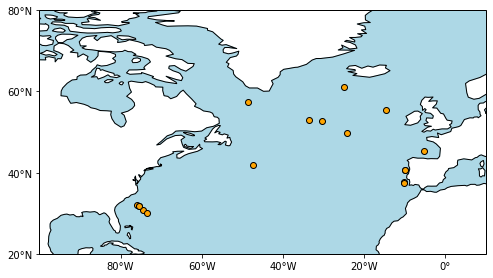

In [47]:
import cartopy.feature as cfeature


# plot core locations

BBox = (-100, 10, 20, 80)

fig, ax = plt.subplots(figsize = (8,7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.scatter(Longitude, Latitude, marker = 'o', color = 'orange', edgecolor = 'black')
#ax.set_title('Core locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.coastlines()
ax.add_feature(cfeature.OCEAN, color = 'lightblue')
ax.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
ax.plot(extent = BBox)

#plt.savefig('Map_core_locations.png')